In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading dataset

df = pd.read_csv('dataset.csv')
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [4]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64

In [5]:
# Dropping null values

df.dropna(inplace = True)

In [6]:
# Dropping Columns that are not useful

df.drop(columns = ['DOL Vehicle ID', '2020 Census Tract'], inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112152 entries, 2 to 112633
Data columns (total 15 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112152 non-null  object 
 1   County                                             112152 non-null  object 
 2   City                                               112152 non-null  object 
 3   State                                              112152 non-null  object 
 4   Postal Code                                        112152 non-null  int64  
 5   Model Year                                         112152 non-null  int64  
 6   Make                                               112152 non-null  object 
 7   Model                                              112152 non-null  object 
 8   Electric Vehicle Type                              112152 non-null  object 
 9 

In [8]:
# Creating column that stores no. of vehicles with respect to County

ev_count_by_county = df.groupby('County').size()
df['EV_Count_County'] = df['County'].map(ev_count_by_county)

# Creating column that stores no. of vehicles with respect to City

ev_count_by_city = df.groupby('City').size()
df['EV_Count_City'] = df['City'].map(ev_count_by_city)

# Creating column that stores no. of vehicles with respect to Postal Code

ev_count_by_postal_code = df.groupby('Postal Code').size()
df['EV_Count_Postal_Code'] = df['Postal Code'].map(ev_count_by_postal_code)

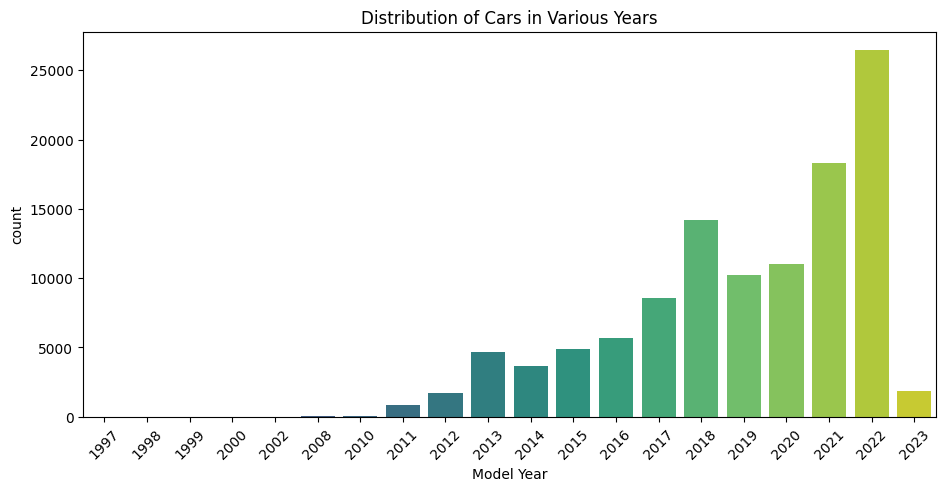

In [9]:
plt.figure(figsize = (11, 5))

sns.countplot(data = df, x = 'Model Year', palette = 'viridis')

plt.title('Distribution of Cars in Various Years')
plt.xticks(rotation=45)
plt.show()

### Most EV vehicles were manufactured in 2022 followed by 2021, year 2023 is low because almost half of the year is still left

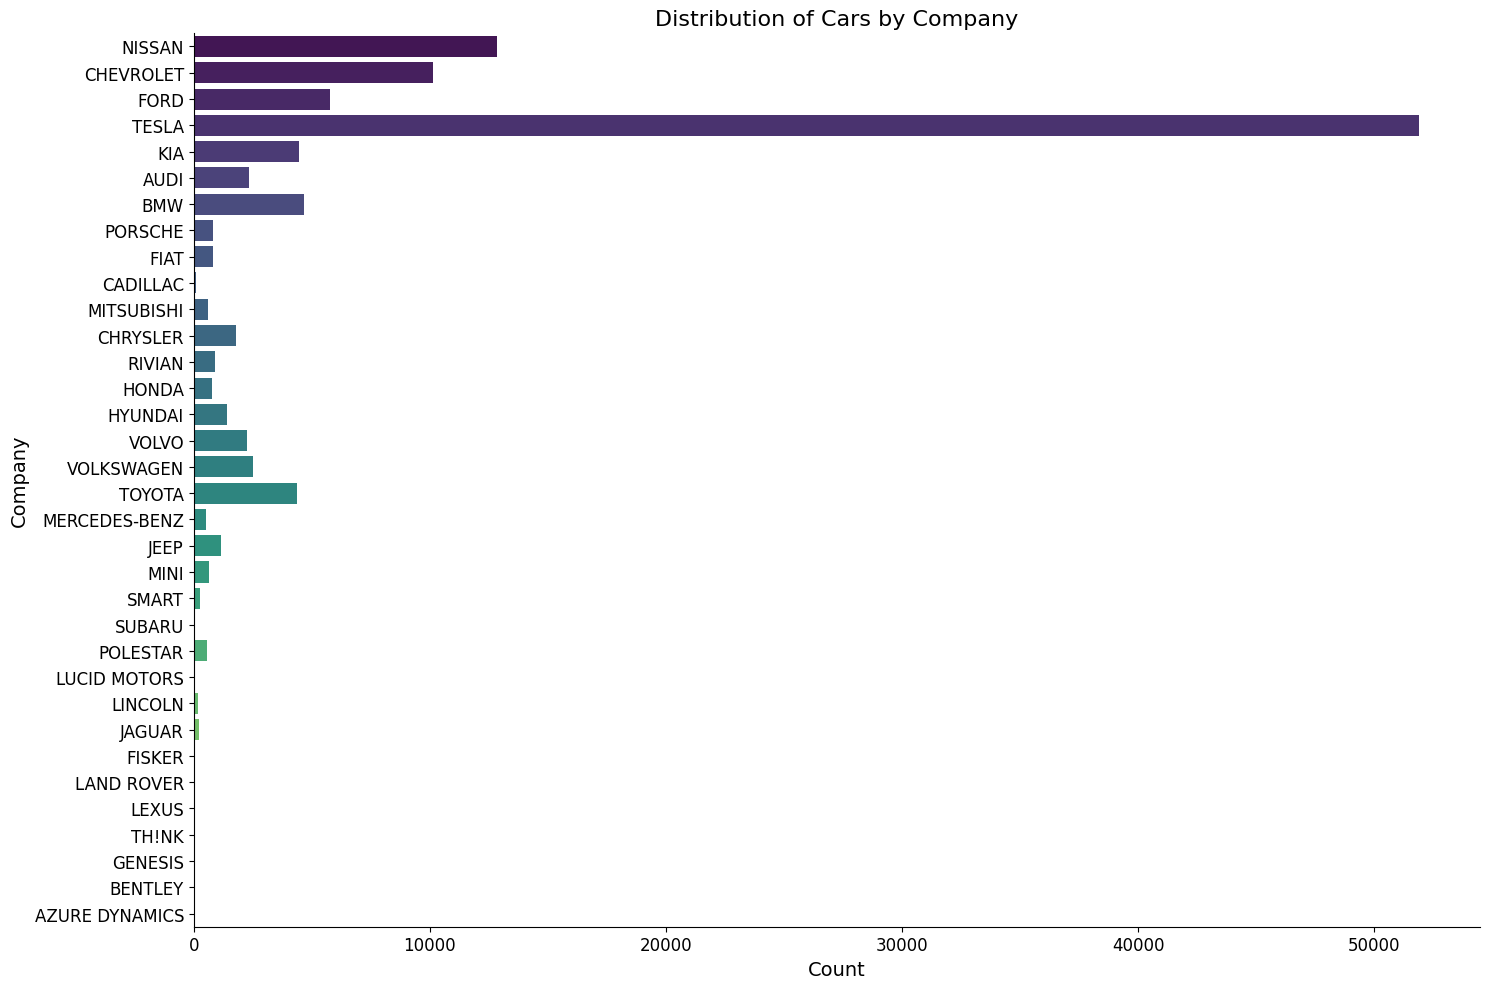

In [10]:
plt.figure(figsize = (15, 10))

sns.countplot(data = df, y = 'Make', palette = 'viridis')

plt.title('Distribution of Cars by Company', fontsize = 16)
plt.xlabel('Count', fontsize = 14)
plt.ylabel('Company', fontsize = 14)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

sns.despine()

plt.tight_layout()
plt.show()

### Tesla has the most EV vehicles followed by Nissan, Chevrolet, Ford, BMW etc.

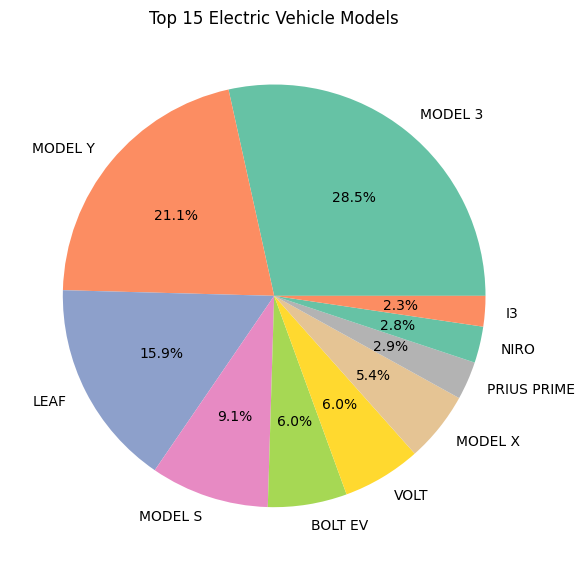

In [11]:
plt.figure(figsize=(6, 6))

plt.pie(df['Model'].value_counts()[:10], labels = df['Model'].value_counts()[:10].index, autopct = '%1.1f%%',
        colors = plt.cm.Set2.colors)

plt.title('Top 15 Electric Vehicle Models')
plt.tight_layout()
plt.show()

### Model 3 of Tesla has almost 30% of EV vehicles followed by Tesla's Model Y. In total almost 50% of market is captured by Tesla in Washington, USA
### Nissan's Leaf is the 3rd vehicle that has captures almost 16% of market.

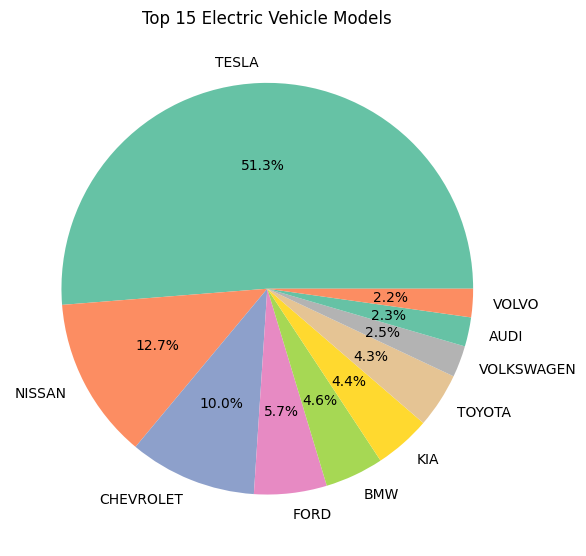

In [12]:
plt.figure(figsize=(6, 6))

plt.pie(df['Make'].value_counts()[:10], labels = df['Make'].value_counts()[:10].index, autopct = '%1.1f%%', colors = plt.cm.Set2.colors)

plt.title('Top 15 Electric Vehicle Models')
plt.tight_layout()
plt.show()

### Tesla captures almost 52% of market whereas 9 companies together capture 50%

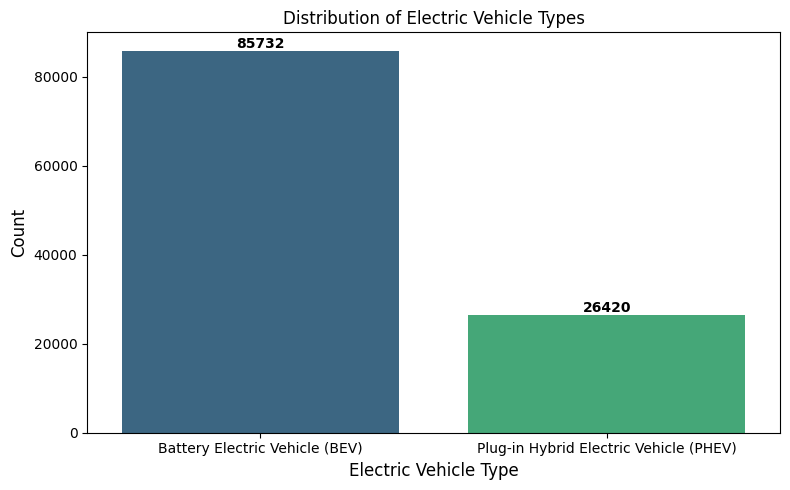

In [13]:
plt.figure(figsize=(8, 5))

sns.barplot(x = df['Electric Vehicle Type'].value_counts().index, y = df['Electric Vehicle Type'].value_counts(), palette = 'viridis')

plt.xlabel('Electric Vehicle Type', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Distribution of Electric Vehicle Types', fontsize = 12)

for index, value in enumerate(df['Electric Vehicle Type'].value_counts()):
    plt.text(index, value, str(value), ha = 'center', va = 'bottom', fontweight = 'bold', fontsize = 10, color = 'black')

plt.tight_layout()
plt.show()

### 86K vehicles are Battery Electric Vehicles whereas only 27K vehicles are Plug-in Hybrid Vehicle that means they use some form of fossil fuels for internal combustion

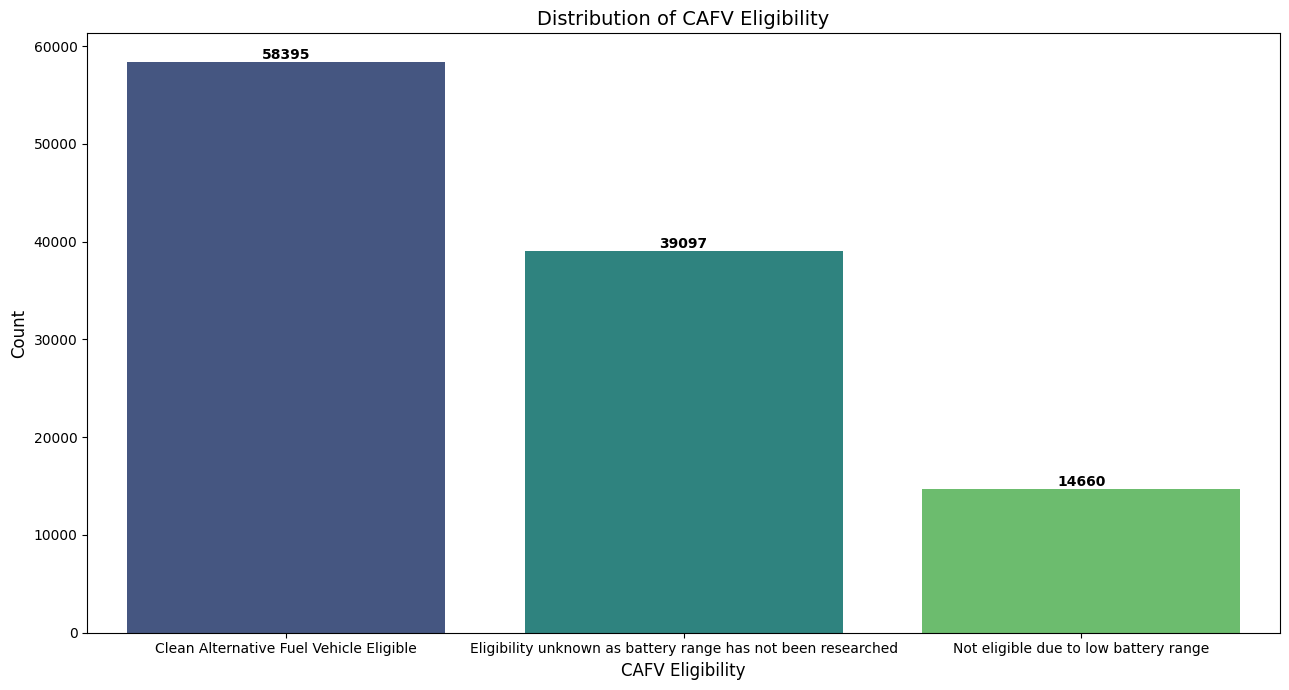

In [14]:
plt.figure(figsize=(13, 7))

sns.barplot(x = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().index, y = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts(), palette = 'viridis')

plt.xlabel('CAFV Eligibility', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Distribution of CAFV Eligibility', fontsize = 14)

for index, value in enumerate(df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()):
    plt.text(index, value, str(value), ha = 'center', va = 'bottom', fontweight = 'bold', fontsize = 10, color = 'black')

plt.tight_layout()
plt.show()

### This graph is self-explanatory due to research work almost 40K vehicles are still unknown

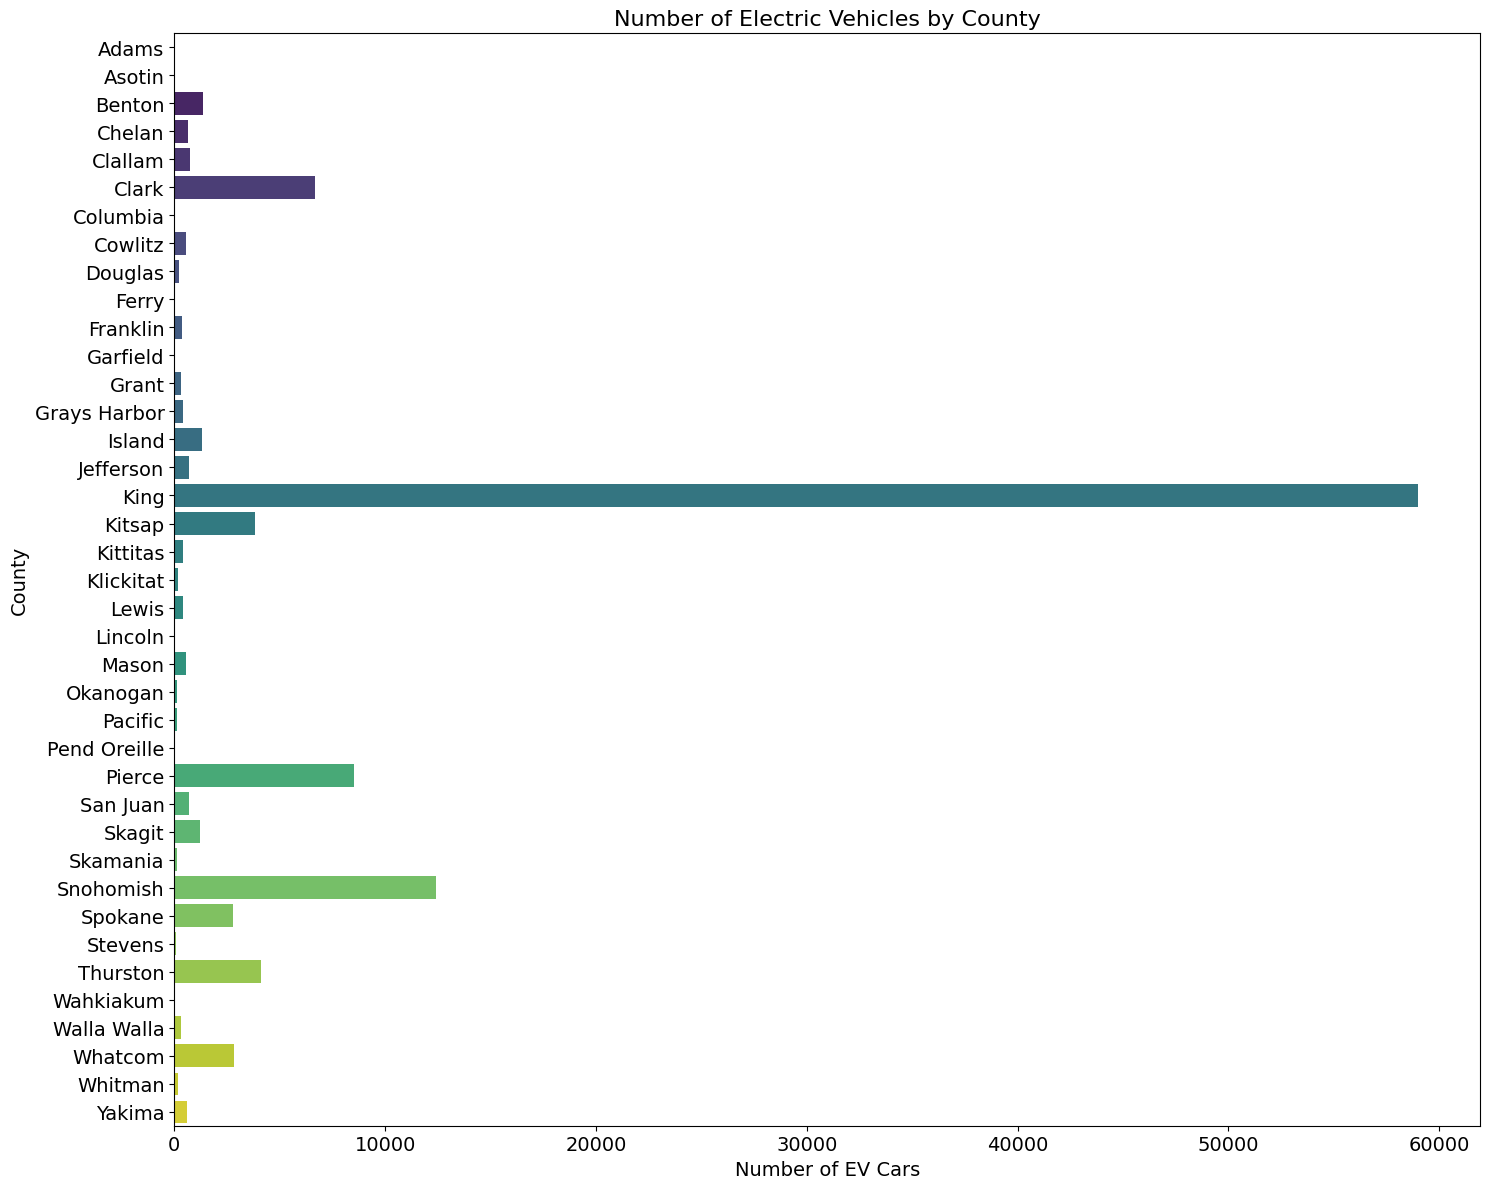

In [15]:
plt.figure(figsize=(15, 12))

sns.barplot(y = ev_count_by_county.index, x = ev_count_by_county.values, palette = 'viridis')

plt.xlabel('Number of EV Cars', fontsize = 14)
plt.ylabel('County', fontsize = 14)
plt.title('Number of Electric Vehicles by County', fontsize = 16)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.tight_layout()
plt.show()

### King has the most no. of EV Cars followed by Snohomish then Pierce. The reason could be there might be more no. of charging stations in these areas

In [16]:
crosstab_df = pd.crosstab(df['Make'], df['Electric Vehicle Type'])
print(crosstab_df)

Electric Vehicle Type  Battery Electric Vehicle (BEV)   
Make                                                    
AUDI                                             1119  \
AZURE DYNAMICS                                      7   
BENTLEY                                             0   
BMW                                               903   
CADILLAC                                            0   
CHEVROLET                                        5270   
CHRYSLER                                            0   
FIAT                                              820   
FISKER                                              0   
FORD                                             2171   
GENESIS                                            18   
HONDA                                               0   
HYUNDAI                                          1091   
JAGUAR                                            218   
JEEP                                                0   
KIA                            

<Figure size 1000x800 with 0 Axes>

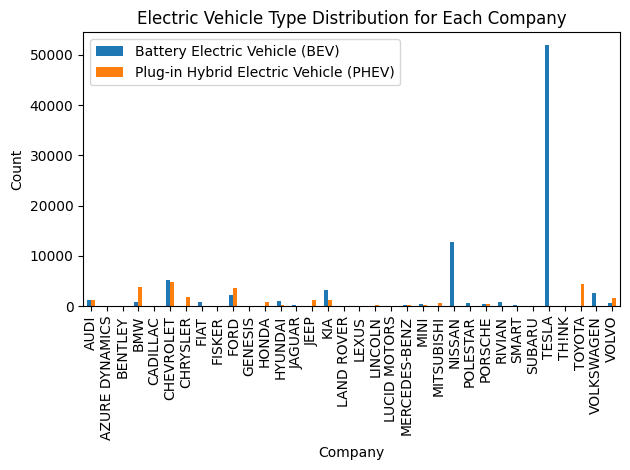

In [17]:
plt.figure(figsize = (10, 8))

grouped_barplot = df.groupby(['Make', 'Electric Vehicle Type']).size().unstack()
grouped_barplot.plot(kind = 'bar', stacked = False)

plt.title('Electric Vehicle Type Distribution for Each Company')
plt.xlabel('Company')
plt.ylabel('Count')

plt.legend()

plt.tight_layout()
plt.show()

### We can see that Tesla is all about BEV vehicles it does not use PHEV vehicles at all
### Nissan aswell follows the same as Tesla
### Toyota uses only PHEV vehicles which is why Toyota is famous all over
### Chevrolet uses almost 60-40 of both types

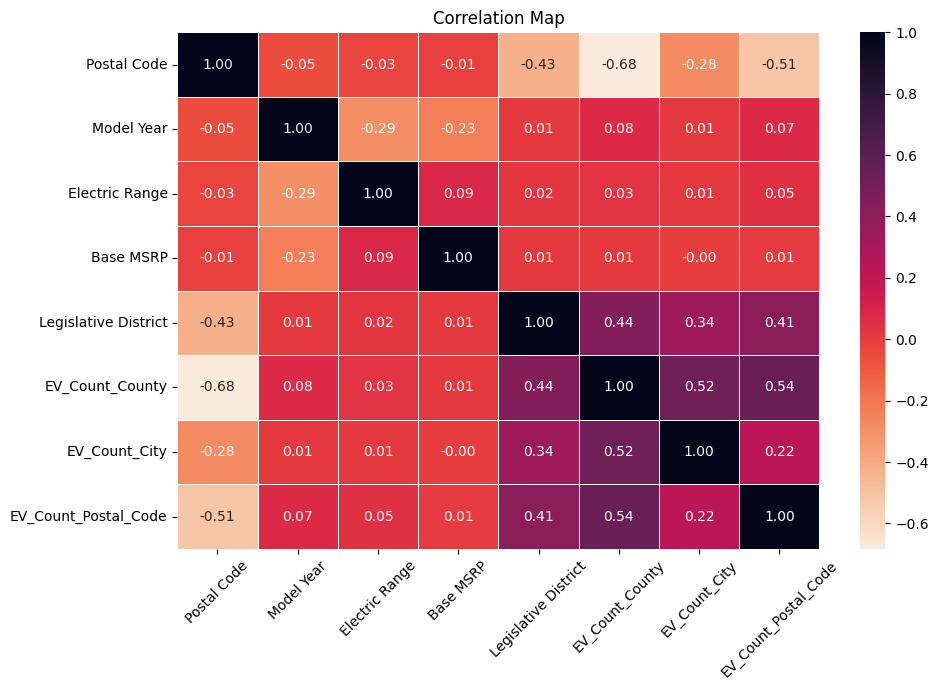

In [18]:
corr = df.corr(numeric_only = True)

plt.figure(figsize = (10, 7))

sns.heatmap(corr, annot = True, cmap = 'rocket_r', fmt = '.2f', linewidths = 0.5)

plt.title('Correlation Map')
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

In [19]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Vehicle Location,Electric Utility,EV_Count_County,EV_Count_City,EV_Count_Postal_Code
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,POINT (-120.50721 46.60448),PACIFICORP,617,400,69
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,1228,21,21
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,12412,1477,250
5,5YJ3E1EB5J,Snohomish,Bothell,WA,98021,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,1.0,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,12412,3334,1155
6,1N4AZ0CP4D,Snohomish,Everett,WA,98203,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,38.0,POINT (-122.23019 47.94949),PUGET SOUND ENERGY INC,12412,1477,344
